# **Import Libraries**

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

# Manipulation
import numpy as np
import pandas as pd


# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing & model
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from phik import resources
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from IPython.display import display
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold


# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# Metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay)


# Imbalanced handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Model saving
import joblib

# **Data Loading**

In [3]:
df = pd.read_csv('P1M2_Annisa_Herliansyah.csv')
df

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,Other,44,DE,Student,237,36,0.30,Mobile,0,1,1
7996,7997,Male,34,AU,Premium,61,64,0.59,Mobile,0,1,0
7997,7998,Female,17,US,Free,81,62,0.33,Desktop,5,0,0
7998,7999,Female,34,IN,Student,245,94,0.27,Desktop,0,1,0


**Insight:**
- Terlihat ada kombinasi pengguna gratis dan berbayar (Free, Family, Premium, Student).
- Pengguna berlangganan (Family, Premium, Student) umumnya tidak mendengar iklan (ads_listened_per_week = 0).
- Pengguna Free cenderung mendengar banyak iklan (misalnya user 1: 31 iklan/minggu).
- Ada variasi device_type, dengan Mobile dan Desktop paling umum.
- Kolom is_churned menunjukkan ada campuran pengguna yang churn (1) dan tidak churn (0).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


**Insight**
- Terdapat 8.000 baris data dengan jumlah kolom sebanyak 12 dimana terdapat 8 kolom numerik dan 4 kolom kategorikal.
- Tidak terdapat missing value dimana semua kolom memiliki 8000 non-null.

In [5]:
df.duplicated().sum()

np.int64(0)

**Insight:**
- Dataset bersih dari duplikat.

In [6]:
df.describe()

,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,37.662125,154.068250,50.127250,0.300127,6.943875,0.747750,0.258875
std,2309.54541,12.740359,84.015596,28.449762,0.173594,13.617953,0.434331,0.438044
min,1.00000,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.75000,26.000000,81.000000,25.000000,0.150000,0.000000,0.000000,0.000000
50%,4000.50000,38.000000,154.000000,50.000000,0.300000,0.000000,1.000000,0.000000
75%,6000.25000,49.000000,227.000000,75.000000,0.450000,5.000000,1.000000,1.000000
max,8000.00000,59.000000,299.000000,99.000000,0.600000,49.000000,1.000000,1.000000


**Insight:**
1. Pengguna rata-rata berusia 38 tahun, mayoritas dewasa muda–paruh baya.
2. Waktu dengar sangat bervariasi, ada pengguna aktif dan pasif.
3. Pengguna rata-rata mendengarkan 50 lagu/hari. Distribusi tampak simetris.
4. Rata-rata pengguna melewati 30% lagu. Nilai ini relatif moderat.
5. Banyak pengguna tidak mendengar iklan (median 0), terindikasi banyak pengguna berlangganan.
6. Sekitar 75% pengguna mendengarkan secara offline, fitur ini khas pengguna berbayar.
7. Sekitar 26% pengguna churn, sisanya 74% masih aktif.

Analisa:
1. Perilaku Pengguna
    - Rata-rata pengguna aktif mendengarkan cukup lama (154 menit) dan memainkan 50 lagu per hari.
    - Nilai std tinggi (terutama listening_time dan songs_played_per_day), hal ini menunjukkan variasi perilaku besar antar pengguna.
    - Skip rate moderat (0.3) menandakan pengalaman pengguna relatif stabil, tidak terlalu bosan atau sering skip.
2. Berkaitan dengan Jenis Langganan (indikasi dari ads & offline)
    - Median ads_listened_per_week = 0 dan median offline_listening = 1, mayoritas pengguna terlihat berlangganan paket berbayar.
    - Namun, adanya nilai max ads_listened_per_week = 49 menunjukkan subset pengguna Free yang cukup terpapar iklan.
3. Churn Overview
    - Hanya 26% pengguna yang churn
    - Karena offline_listening berkorelasi positif dengan paket berbayar, kemungkinan pengguna non-offline (0) lebih rentan churn.

In [7]:
data = df.copy()
data

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,Other,44,DE,Student,237,36,0.30,Mobile,0,1,1
7996,7997,Male,34,AU,Premium,61,64,0.59,Mobile,0,1,0
7997,7998,Female,17,US,Free,81,62,0.33,Desktop,5,0,0
7998,7999,Female,34,IN,Student,245,94,0.27,Desktop,0,1,0


# **EDA**

## 1. Distribusi Target (is_churned)

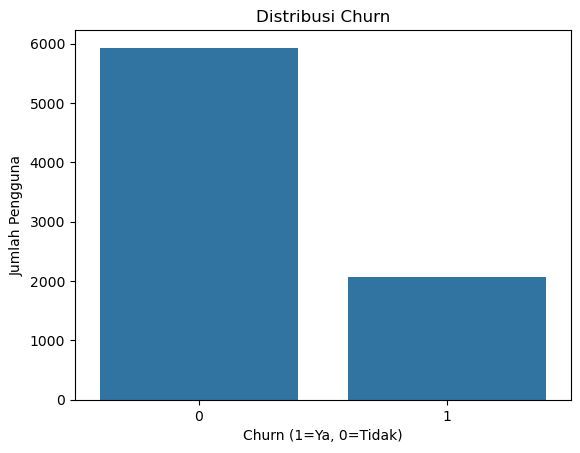

In [8]:
sns.countplot(x='is_churned', data=df)
plt.title('Distribusi Churn')
plt.xlabel('Churn (1=Ya, 0=Tidak)')
plt.ylabel('Jumlah Pengguna')
plt.show()

**Insight:**
- Mayoritas pengguna TIDAK churn (label 0): sekitar 75%
- Minoritas pengguna churn (label 1): sekitar 25%

Implikasi:
- Plot diatas menunjukkan bahwa dataset tidak seimbang (imbalanced) sehingga memerlukan penanganan dengan SMOTE

## 2. Hubungan antara frekuensi mendengar iklan dan churn

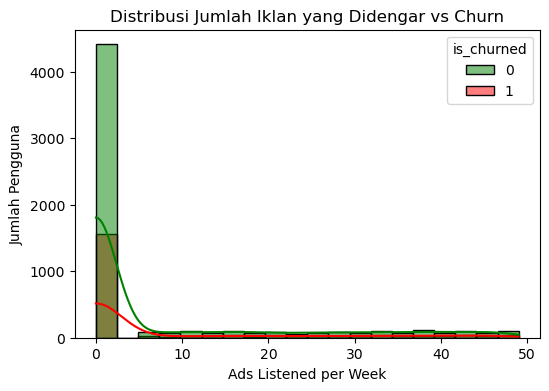

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='ads_listened_per_week', hue='is_churned', bins=20, kde=True, palette={0:'green', 1:'red'})
plt.title('Distribusi Jumlah Iklan yang Didengar vs Churn')
plt.xlabel('Ads Listened per Week')
plt.ylabel('Jumlah Pengguna')
plt.show()

**Insight:**
1. Mayoritas pengguna mendengarkan sangat sedikit iklan (0–5 per minggu):
    - Terlihat dari tingginya bar di sebelah kiri (X=0 hingga X=5).
    - Ini berlaku untuk kedua kelompok (churn dan non-churn).
2. Pengguna yang churn tampaknya lebih banyak pada level rendah iklan (sekitar 0–2):
    - Terlihat dari puncak kurva merah yang sedikit lebih tinggi di awal.
3. Pengguna yang tetap (non-churn) juga mendominasi di level iklan rendah, tetapi lebih merata:
    - Kurva hijau menurun secara lebih tajam, namun memiliki distribusi lebih luas dibanding kurva merah.

Kemungkinan Interpretasi:
- Paparan iklan rendah tidak serta-merta menyebabkan churn, tetapi bisa menjadi indikator bahwa pengguna tidak terlalu aktif (sehingga lebih mungkin churn).
- Pengguna yang bertahan mungkin lebih terlibat, meskipun mendengarkan banyak iklan.

In [10]:
data.columns

Index(['user_id', 'gender', 'age', 'country', 'subscription_type',
       'listening_time', 'songs_played_per_day', 'skip_rate', 'device_type',
       'ads_listened_per_week', 'offline_listening', 'is_churned'],
      dtype='object')

## 3. Kecenderungan pengguna dengan subscription Free terhadap chrun

In [11]:
free_users = data[data['subscription_type'] == 'Free']

In [12]:
free_churn_rate = free_users['is_churned'].value_counts(normalize=True) * 100
print("Persentase churn di antara pengguna Free:\n", free_churn_rate)

Persentase churn di antara pengguna Free:
 is_churned
0    75.074331
1    24.925669
Name: proportion, dtype: float64


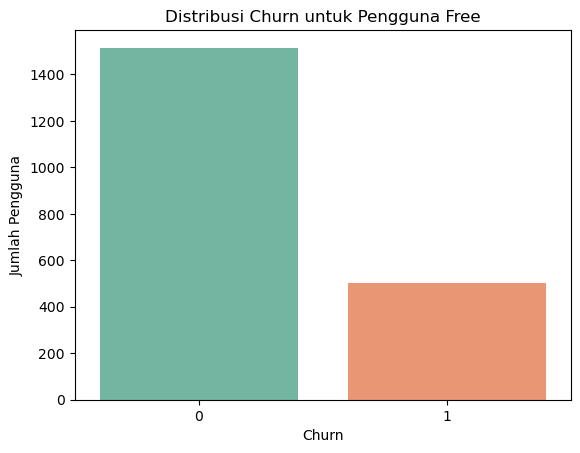

In [13]:
sns.countplot(data=free_users, x='is_churned', palette='Set2')
plt.title('Distribusi Churn untuk Pengguna Free')
plt.xlabel('Churn')
plt.ylabel('Jumlah Pengguna')
plt.show()


## 4. Listening time rendah dan skip rate tinggi berkontribusi ke churn

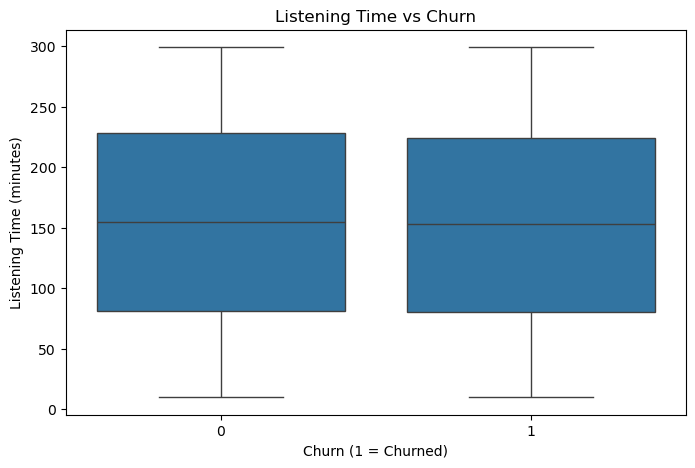

In [14]:
# Distribusi Listening Time vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_churned', y='listening_time', data=df)
plt.title('Listening Time vs Churn')
plt.xlabel('Churn (1 = Churned)')
plt.ylabel('Listening Time (minutes)')
plt.show()

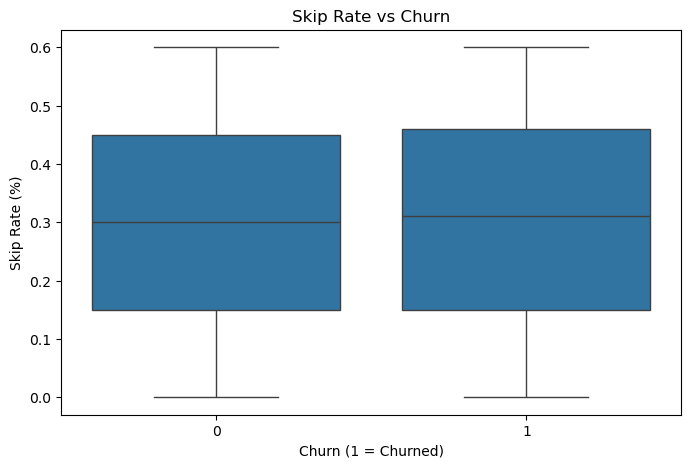

In [15]:
# Distribusi Skip Rate vs Churn
# Boxplot skip_rate
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_churned', y='skip_rate', data=df)
plt.title('Skip Rate vs Churn')
plt.xlabel('Churn (1 = Churned)')
plt.ylabel('Skip Rate (%)')
plt.show()


In [16]:
# Mean & median by churn group
df.groupby('is_churned')[['listening_time', 'skip_rate']].agg(['mean', 'median', 'std'])

listening_time                   skip_rate                 
                     mean median        std      mean median       std
is_churned                                                            
0              154.446787  155.0  84.323276  0.298474   0.30  0.173328
1              152.984549  153.0  83.139146  0.304862   0.31  0.174310

**Insight:**
1. 	listening_time
    - Rata-rata listening time sedikit lebih rendah untuk pengguna yang churn.
    - Namun, perbedaannya sangat kecil (~1.5 menit).
    - Median juga sangat dekat → distribusinya mirip.
    - Kemungkinan besar perbedaannya tidak signifikan secara praktis.
2. skip_rate
    - Skip rate sedikit lebih tinggi pada pengguna churn.
    - Kenaikan kecil (~0.006 atau 0.6%)
    - Lagi-lagi, perbedaannya sangat kecil — meskipun mungkin secara statistik signifikan, tapi secara praktis kurang kuat tanpa variabel lain.

*Kesimpulan*
- Ya, churned users punya listening time sedikit lebih rendah dan skip rate sedikit lebih tinggi, namun perbedaannya sangat kecil.
- Ini menunjukkan bahwa sendiri, kedua fitur ini mungkin tidak cukup kuat untuk memprediksi churn.
- Mereka bisa bermanfaat bila digabungkan dengan fitur lain (misalnya: subscription_type, ads_listened_per_week, offline_listening, dll).

## 5. Korelasi Fitur Numerik terhadap Churn

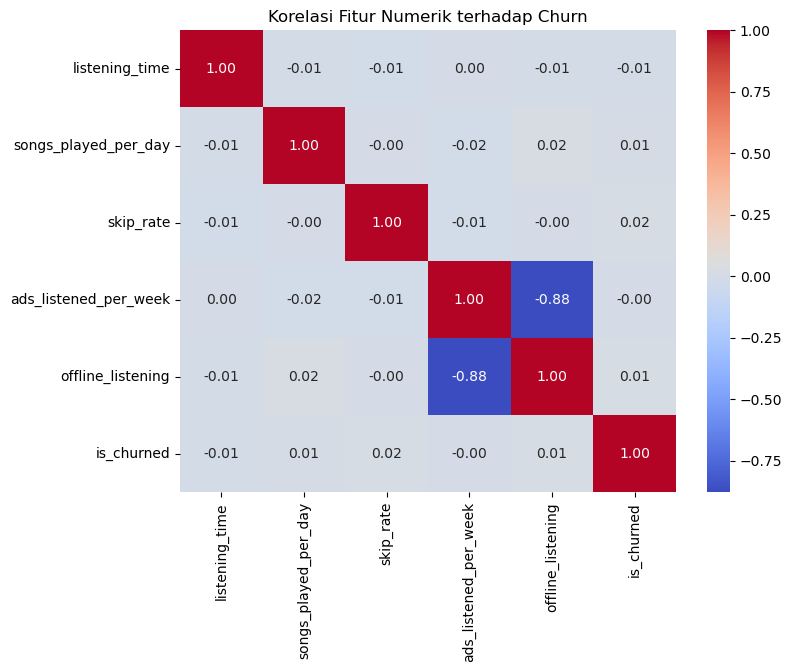

In [17]:
corr = df[['listening_time','songs_played_per_day','skip_rate',
           'ads_listened_per_week','offline_listening','is_churned']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Fitur Numerik terhadap Churn')
plt.show()


**Insight:**
1. Korelasi Fitur dengan is_churned Sangat Lemah
    - Semua fitur numerik memiliki korelasi yang sangat rendah dengan churn (nilai korelasi antara -0.01 hingga +0.02).
    - Hal ini mangasumsikan tidak ada satu variabel tunggal yang cukup kuat untuk menjelaskan perilaku churn secara langsung.
2. Korelasi Negatif Kuat: ads_listened_per_week vs offline_listening (-0.88)
    - Semakin sering pengguna mendengarkan musik secara offline, semakin sedikit iklan yang mereka dengarkan.
    - Ini sangat logis karena pengguna offline biasanya tidak menerima iklan (mereka mungkin pelanggan premium atau mendownload lagu sebelumnya).

Analisis lanjutan
1. Tidak Ada Satu Penyebab Churn
    - Karena tidak ada fitur dengan korelasi tinggi ke churn, perusahaan tidak bisa hanya mengandalkan satu metrik (seperti iklan atau waktu dengar).
2. Iklan Tidak Terbukti Mendorong Churn Secara Langsung
    - Jumlah iklan yang didengar (ads_listened_per_week) tidak punya korelasi signifikan terhadap churn.
    - Artinya, pengguna tidak langsung churn hanya karena mereka mendengar banyak iklan.
    - Aksi Bisnis:
        - Monetisasi dari iklan tetap bisa dilanjutkan tanpa kekhawatiran besar terhadap churn.
        - Fokus churn sebaiknya dialihkan ke metrik lain seperti aktivitas mendengarkan, engagement, atau perubahan perilaku.
3. Offline Listening = Tanda Pelanggan Premium dan Loyal
    - Pengguna yang sering mendengarkan offline memiliki korelasi negatif dengan jumlah iklan → besar kemungkinan mereka adalah pengguna premium.
    - Mereka mungkin lebih engaged, loyal, dan lebih kecil kemungkinan churn.
    - Aksi Bisnis:
        - Fokus retensi ke segmen non-premium (tidak offline).
        - Dorong konversi ke premium dengan promosi fitur offline.

In [18]:
# Menghapus 1 kolom, misalnya kolom 'Kota'
df = df.drop('user_id', axis=1)

# **v. Feature Engineering**

## 1. Split Between X dan y

In [19]:
df.columns

Index(['gender', 'age', 'country', 'subscription_type', 'listening_time',
       'songs_played_per_day', 'skip_rate', 'device_type',
       'ads_listened_per_week', 'offline_listening', 'is_churned'],
      dtype='object')

In [20]:
# Mengambil semua kolom kecuali 'is_churned' sebagai feature
X = df.drop(['is_churned'], axis=1)

# Mengambil hanya kolom 'is_churned' sebagai target
y = df['is_churned']

X

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening
0,Female,54,CA,Free,26,23,0.20,Desktop,31,0
1,Other,33,DE,Family,141,62,0.34,Web,0,1
2,Male,38,AU,Premium,199,38,0.04,Mobile,0,1
3,Female,22,CA,Student,36,2,0.31,Mobile,0,1
4,Other,29,US,Family,250,57,0.36,Mobile,0,1
...,...,...,...,...,...,...,...,...,...,...
7995,Other,44,DE,Student,237,36,0.30,Mobile,0,1
7996,Male,34,AU,Premium,61,64,0.59,Mobile,0,1
7997,Female,17,US,Free,81,62,0.33,Desktop,5,0
7998,Female,34,IN,Student,245,94,0.27,Desktop,0,1


## 2. Split Between Numerical & Categorical Column

In [21]:
# Menyimpan kolom-kolom numerik
num_col = ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week']

# Menyimpan kolom-kolom kategorikal (belum di-encode)
cat_col = ['gender', 'country', 'subscription_type', 'device_type']

# Menyimpan kolom-kolom kategorikal yang sudah di-encode
cat_encoded = ['offline_listening']

**Insight**
1. num_col, kolom-kolom numerik yang kan digunakan untuk proses scaling  (normalisasi/standarisasi) sebelum dimasukkan ke model.
2. cat_col, kolom-kolom kategorikal (belum di-encode) yang akan melalui proses encoding (seperti one-hot encoding atau label encoding).
3. cat_encoded, kolom kategorikal yang sudah di-encode menjadi angka dan siap langsung dipakai dalam pemodelan.

## 3. Cardinality Handling

In [22]:
# Perulangan menampilkan nilai unik di dalam kolom kategori
for i in cat_col:
    # menghitung data yg unik dari kolom kategori
    print(f'Jumlah unique value dari kolom {i} : {X[i].nunique()}')

Jumlah unique value dari kolom gender : 3
Jumlah unique value dari kolom country : 8
Jumlah unique value dari kolom subscription_type : 4
Jumlah unique value dari kolom device_type : 3


**Insight**
- Berdasarkan nilai unik dari setiap kolom kategori, dapat disimpulkan seluruh kolom kategori memiliki nilai unik yang kecil yang termasuk kedalam kategori low cardinality sehingga tidak diperlukan penanganan khusus dan bisa langsung dilakukan OHE.

## 4. Split Between Train-set dan Test-set

In [23]:
# Splitting between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Menampilkan dimensi data
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)


Train Size :  (6400, 10)
Test Size :  (1600, 10)


**Insight**
- Didapatkan banyaknya data untuk train sebanyak 6400 data dan data untuk test sebanyak 1600 dimana perbandingannya sebesar 80:20 dengan total kolom sebanyak 10 kolom.

## 5. Handle Outlier

### Cek Nilai Skewness

In [24]:
# Mengecek nilai skewness pada kolom numerical
def check_skewness(df, *column_names):
    return {col: df[col].skew() for col in column_names if col in df.columns}

skewness_results = check_skewness(X_train, 'age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week')

# Print skewness
for col, skewness in skewness_results.items():
    print(f"{col}: {skewness}")

age: -0.026777144114498077
listening_time: 0.010927553583343299
songs_played_per_day: -0.005388070933798414
skip_rate: 0.004235861051287867
ads_listened_per_week: 1.7734386306953667


**Insight**
- Empat dari lima kolom numerik (age, listening_time, songs_played_per_day, dan skip_rate) memiliki distribusi yang sangat simetris, karena nilai skewness-nya sangat dekat ke 0. Dapat disimpulkan data sudah cukup normal dan tidak perlu dilakukan penanganan khusus.
- Kolom ads_listened_per_week memiliki skewness tinggi (1.77):
    - Distribusinya sangat miring ke kanan, yang berarti mayoritas nilai kecil (misalnya 0–5), tetapi ada sebagian kecil pengguna yang mendengarkan iklan sangat banyak (outlier). Sehingga diperlukan penanganan khusus.

### Mengkategorikan kolom berdasarkan nilai skewness nya (Normal, Skewed, Extreme Skewed)

In [25]:
# Membuat list kosong untuk kolom yang termasuk ke dalam masing-masing kategori list
normal_columns = []
skewed_columns = []
extreme_skewed_columns = []

# Melakukan looping untuk memasukkan kolom ke masing-masing List Kategori kolom kosong berdasarkan nilai skewnessnya
for col, skewness in skewness_results.items():
    if skewness < -1.0 or skewness > 1.0:
        extreme_skewed_columns.append(col)
    elif abs(skewness) <= 0.5: 
        normal_columns.append(col)
    else:
        skewed_columns.append(col)

# Print Kolom berdasarkan list kategori kolom skewnessnya
print(f"Normal: {normal_columns}\nSkewed: {skewed_columns}\nExtreme Skewed: {extreme_skewed_columns}")

Normal: ['age', 'listening_time', 'songs_played_per_day', 'skip_rate']
Skewed: []
Extreme Skewed: ['ads_listened_per_week']


### Menghitung persentase outlier 

#### a. Terhadap kolom yang **Normal**

In [26]:
# Fungsi menghitung persentase outlier pada kolom numerik yang 'normal'
def calculate_outlier_percentages_normal(df, columns):
    outlier_results = {}
    for variable in columns:
        std = df[variable].std()
        lower_boundary = df[variable].quantile(0.25) - (std * 3)
        upper_boundary = df[variable].quantile(0.75) + (std * 3)

        outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
        outlier_percentage = len(outliers) / len(df) * 100

        outlier_results[variable] = round(outlier_percentage, 2)

    return outlier_results

In [27]:
outlier_percentages = calculate_outlier_percentages_normal(X_train, normal_columns)

# Cetak hasil
for col, pct in outlier_percentages.items():
    print(f"Percentage of outliers in {col}: {pct}%")


Percentage of outliers in age: 0.0%
Percentage of outliers in listening_time: 0.0%
Percentage of outliers in songs_played_per_day: 0.0%
Percentage of outliers in skip_rate: 0.0%


**Insight**
- Data Bersih dan Konsisten, tidak ada nilai ekstrim atau anomali dalam 4 kolom utama.
- Distribusi Stabil, karena tidak ada outlier sehingga distribusi setiap fitur cenderung stabil, dan tidak berat sebelah ke nilai ekstrem.
- Tidak perlu penanganan tambahan dan bisa langsung melakukan scaling.

#### b. Terhadap kolom yang **Skewed**

In [28]:
# Fungsi menghitung persentase outlier pada kolom numerik yang 'skew'
def calculate_outlier_percentages_skew(df, columns, distance):
    outlier_results = {}
    for variable in columns:
        Q1 = df[variable].quantile(0.25)
        Q3 = df[variable].quantile(0.75)
        IQR = Q3 - Q1

        lower_boundary = Q1 - (IQR * distance)
        upper_boundary = Q3 + (IQR * distance)

        outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
        outlier_percentage = len(outliers) / len(df) * 100

        outlier_results[variable] = round(outlier_percentage, 2)

    return outlier_results


In [29]:
skewed_outliers = calculate_outlier_percentages_skew(X_train, skewed_columns, 1.5)
extreme_skewed_outliers = calculate_outlier_percentages_skew(X_train, extreme_skewed_columns, 3)

for col, pct in skewed_outliers.items():
    print(f"[Skewed] Outliers in {col}: {pct}%")

for col, pct in extreme_skewed_outliers.items():
    print(f"[Extreme Skewed] Outliers in {col}: {pct}%")


[Extreme Skewed] Outliers in ads_listened_per_week: 14.75%


**Insight**
- Hampir 15% data di kolom ini adalah outlier — ini bukan jumlah kecil.
- Artinya ada cukup banyak pengguna yang mendengarkan iklan dalam jumlah sangat tinggi dibanding mayoritas pengguna lainnya.
- Hal ini bisa menyebabkan:
    - Model menjadi bias terhadap pola pengguna ekstrem
    - Distribusi berat sebelah
- Peru dilakukan penanganan khusus

### Visualisasi Outlier

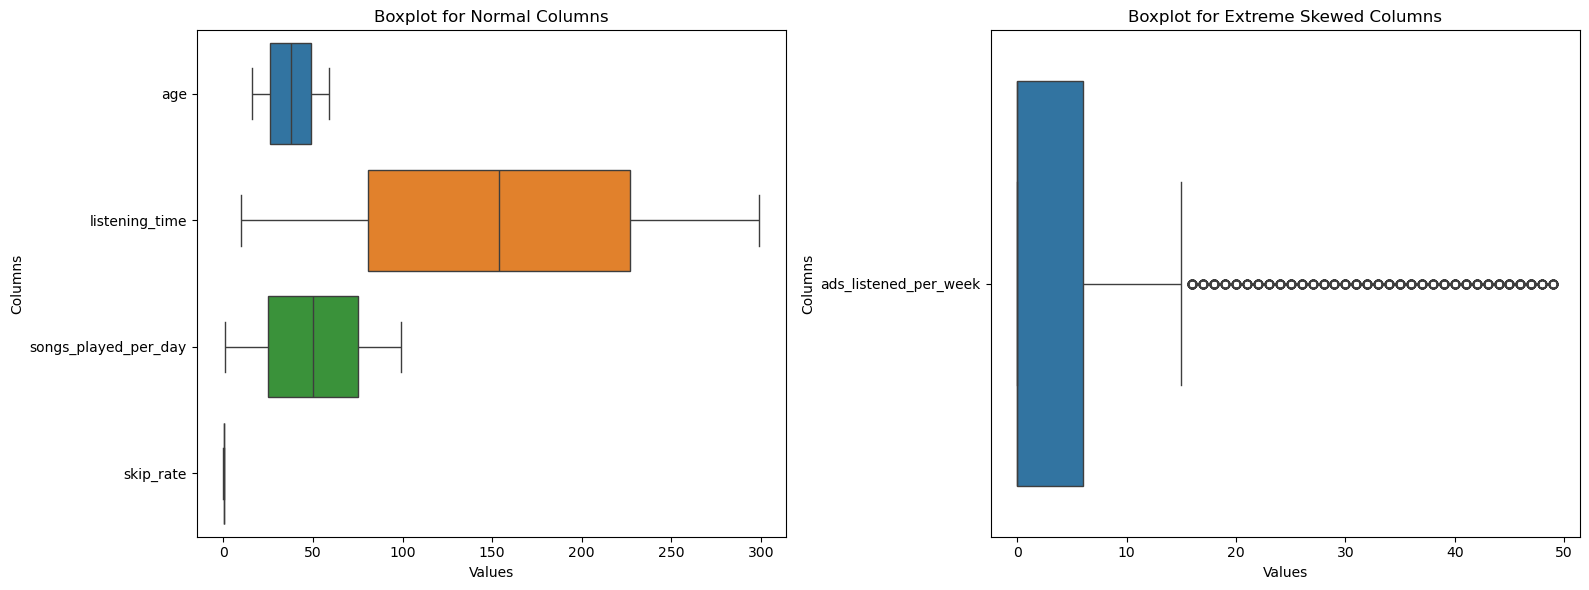

In [30]:
# Create a figure and two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot untuk kolom normal
sns.boxplot(data=X_train[normal_columns], orient="h", ax=axes[0])
axes[0].set_title("Boxplot for Normal Columns")
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Columns")

# Boxplot untuk kolom extreme skewed 
sns.boxplot(data=X_train[extreme_skewed_columns], orient="h", ax=axes[1])
axes[1].set_title("Boxplot for Extreme Skewed Columns")
axes[1].set_xlabel("Values")
axes[1].set_ylabel("Columns")

# Menampilkan plot
plt.tight_layout()
plt.show()

**Insight**
1. Kolom normal:
    - Distribusi data cukup stabil, tanpa banyak outlier.
    - Sesuai dengan hasil analisis statistik yang menunjukkan skewness mendekati nol dan outlier 0%.
    - Kolom-kolom ini siap langsung untuk scaling dan modeling tanpa transformasi.
2. Kolom skewed:
    - Banyak outlier dan distribusi sangat tidak simetris.
    - Visual menunjukkan perlunya penanganan untuk mengurangi skewness dan dampak outlier.

### Penanganan Outlier dengan Winsorization

Dilakukan penanganan terhadap outlier dengan winsorization untuk tetap mempertahankan sebagian besar nilai asli tapi mengurangi pengaruh outlier ekstrim. Sehingga tidak membuang data (drop) atau merubah bentuk distribusi secara drastis.

In [31]:
# Melakukan capping untuk outlier dengan Winsorizer
winsor = Winsorizer(
    capping_method='iqr',
    tail='both',
    fold=1.5
)

## 6. Feature Selection

In [32]:
# Concatenate X_train and y_train
concat_train = pd.concat([X_train, y_train], axis=1) 

# Menampilkan X_train
concat_train.head()

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
323,Male,17,UK,Free,49,26,0.54,Desktop,12,0,0
1719,Female,46,DE,Student,226,22,0.08,Web,0,1,0
5722,Male,16,UK,Free,270,77,0.19,Mobile,48,0,0
6677,Male,21,AU,Student,77,13,0.21,Desktop,0,1,0
4843,Other,57,US,Student,76,92,0.51,Mobile,0,1,0


In [33]:
print(concat_train.columns)

Index(['gender', 'age', 'country', 'subscription_type', 'listening_time',
       'songs_played_per_day', 'skip_rate', 'device_type',
       'ads_listened_per_week', 'offline_listening', 'is_churned'],
      dtype='object')


Mengetahui nilai phik untuk mencari seberapa besar korelasi fitur terhadap target

In [34]:
# Membuat fungsi untuk mengecek korelasi dengan phik
def compute_phik_correlation(dataframe, columns, target):
    subset = dataframe[columns]
    correlation_matrix = subset.phik_matrix()
    return correlation_matrix[target]

# Mengidentifikasi list kolom
columns = ['gender', 'age', 'country', 'subscription_type', 'listening_time', 'songs_played_per_day', 
           'skip_rate', 'device_type', 'ads_listened_per_week', 'offline_listening', 'is_churned']
target = ['is_churned']

# Mengecek korelasi antar kolom dengan target
correlation = compute_phik_correlation(concat_train, columns, target)

# Print hasil
print(correlation)

interval columns not set, guessing: ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week', 'offline_listening', 'is_churned']
                       is_churned
gender                   0.007991
age                      0.000000
country                  0.000000
subscription_type        0.000000
listening_time           0.034718
songs_played_per_day     0.037823
skip_rate                0.000000
device_type              0.000000
ads_listened_per_week    0.024644
offline_listening        0.000000
is_churned               1.000000


**Insight**
- Terhadap fitur diatas didapatkan nilai korelasi yang sangat lemah. Asumsi bahwa kolom 'is_churned' kemungkinan dipengaruhi oleh beberapa fitur yang tergabung sehingga diputuskan untuk tetap mempertahankan fitur-fitur diatas tanpa drop salah satu fitur. 

## Pipeline

In [35]:
# Pipeline kolom numerik
num_pipe = Pipeline([('winsor', winsor),
                    ('scaling', StandardScaler())])

# Pipeline kolom kategorikal
cat_pipe = Pipeline([('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

## Column Transformer

In [36]:
preprocess = ColumnTransformer([
    ('numeric', num_pipe, num_col),
    ('categorical', cat_pipe, cat_col),
    ('encoded', 'passthrough', cat_encoded)
])
preprocess

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['age', 'listening_time',
                                  'songs_played_per_day', 'skip_rate',
                                  'ads_listened_per_week']),
                                ('categorical',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['gender', 'country', 'subscription_type',
                                  'device_type']),
                                ('encoded', 'passthrough',
                                 ['offline_listening'])])

# **Model Definition**

Dalam proyek ini, digunakan lima algoritma utama: K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Decision Tree, Random Forest, dan salah satu boosting yaitu XGBoost.

**KNN** dipilih karena caranya yang sederhana, yaitu menebak kelas sebuah data berdasarkan data-data terdekat di sekitarnya. Namun, model ini kurang cocok jika jumlah data dari tiap kelas tidak seimbang, sehingga kemungkinan melewatkan pelanggan yang akan churn (false negative) bisa cukup tinggi.

**SVM** dipilih karena kemampuannya memisahkan data menjadi dua kelompok dengan jarak terjauh antar kelompok tersebut. Model ini juga bagus untuk data yang punya banyak fitur. Dengan pengaturan khusus, SVM bisa membantu mengurangi kesalahan melewatkan pelanggan yang mungkin churn.

**Decision Tree** digunakan karena bisa menemukan pola yang rumit dan memberikan aturan keputusan yang mudah dimengerti. Walau kadang model ini bisa terlalu "mengingat" data latihan (overfitting), kita bisa mengatur agar model lebih fokus menemukan pelanggan churn dengan benar.

**Random Forest** adalah kumpulan banyak decision tree yang bekerja bersama untuk meningkatkan akurasi dan hasil yang lebih stabil. Model ini juga bisa diatur agar lebih peka dalam menemukan pelanggan yang akan churn, sehingga membantu mengurangi kesalahan melewatkan pelanggan penting.

**XGBoost** dipilih karena biasanya memberikan hasil yang sangat akurat dan bisa menangani data yang tidak seimbang dengan baik. Model ini juga menghasilkan skor kemungkinan churn, sehingga kita bisa atur batas supaya model tidak melewatkan pelanggan yang berisiko tinggi churn.

**Hyperparameter:**
Semua model ini diterapkan dengan konfigurasi default terlebih dahulu untuk evaluasi awal, dengan rencana tuning lebih lanjut untuk mengoptimalkan performa khususnya dalam meminimalkan false negative.

**Metrik evaluasi:**
Model dievaluasi menggunakan Accuracy, Precision, Recall, F1-Score, dan ROC-AUC.
- Accuracy memberikan gambaran akurasi keseluruhan.
- Precision mengukur ketepatan prediksi kelas churn.
- Recall menjadi fokus utama karena menunjukkan kemampuan model dalam mendeteksi semua pelanggan yang mungkin churn, sehingga false negative dapat diminimalkan.
- F1-Score menggabungkan Precision dan Recall untuk hasil yang lebih seimbang.
- ROC-AUC menilai kemampuan pemisahan antara kelas churn dan tidak churn.

**Persiapan data dan pipeline:**
Data telah melalui proses pembersihan, serta transformasi fitur numerik dan kategorikal. Preprocessing seperti winsorization untuk mengatasi nilai ekstrim, scaling fitur numerik, dan encoding fitur kategorikal dilakukan dalam pipeline. Hal ini menjamin konsistensi input ke semua model dan menghindari data leakage, sehingga pelatihan dan prediksi model dapat dilakukan secara efisien dan handal.

In [37]:
## Pipeline untuk masing-masing model
model_knn = Pipeline([('preprocess', preprocess),
                    ('smote', SMOTE(random_state=42)),
                    ('knn', KNeighborsClassifier())])
    

model_svm = Pipeline([
    ('preprocess', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
])

model_dt = Pipeline([
    ('preprocess', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
])

model_rf = Pipeline([
    ('preprocess', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

model_xgb = Pipeline([
    ('preprocess', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

**Insight**
- preprocess adalah pipeline preprocessing yang sudah dibuat.
- SMOTE akan menyeimbangkan kelas target di data training supaya model tidak bias terhadap kelas mayoritas.
- Untuk SVM ditambahkan probability=True supaya bisa menghasilkan probabilitas prediksi (berguna untuk threshold tuning).

In [38]:
# Membuat fungsi untuk menampilkan pipeline untuk semua model
def display_models(models_dict):
    for name, model in models_dict.items():
        print(f"Model pipeline: {name}")
        display(model)

models = {
    'KNN': model_knn,
    'SVM': model_svm,
    'Decision Tree': model_dt,
    'Random Forest': model_rf,
    'XGBoost': model_xgb
}

display_models(models)

Model pipeline: KNN


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('winsor',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['age', 'listening_time',
                                                   'songs_played_per_day',
                                                   'skip_rate',
                                                   'ads_listened_per_week']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'country',
                                                   'subscription_type',
                                                   'device_type']),
                                                 ('encoded', 'passthrough',
                                                  ['offline_listening'])])),
                ('smote', SMOTE(random_state=42)),
                ('knn', KNeighborsClassifier())])

Model pipeline: SVM


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('winsor',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['age', 'listening_time',
                                                   'songs_played_per_day',
                                                   'skip_rate',
                                                   'ads_listened_per_week']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'country',
                                                   'subscription_type',
                                                   'device_type']),
                                                 ('encoded', 'passthrough',
                                                  ['offline_listening'])])),
                ('smote', SMOTE(random_state=42)),
                ('svm', SVC(probability=True, random_state=42))])

Model pipeline: Decision Tree


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('winsor',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['age', 'listening_time',
                                                   'songs_played_per_day',
                                                   'skip_rate',
                                                   'ads_listened_per_week']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'country',
                                                   'subscription_type',
                                                   'device_type']),
                                                 ('encoded', 'passthrough',
                                                  ['offline_listening'])])),
                ('smote', SMOTE(random_state=42)),
                ('dt', DecisionTreeClassifier(random_state=42))])

Model pipeline: Random Forest


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('winsor',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['age', 'listening_time',
                                                   'songs_played_per_day',
                                                   'skip_rate',
                                                   'ads_listened_per_week']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'country',
                                                   'subscription_type',
                                                   'device_type']),
                                                 ('encoded', 'passthrough',
                                                  ['offline_listening'])])),
                ('smote', SMOTE(random_state=42)),
                ('rf', RandomForestClassifier(random_state=42))])

Model pipeline: XGBoost


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('winsor',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['age', 'listening_time',
                                                   'songs_played_per_day',
                                                   'skip_rate',
                                                   'ads_listened_per_week']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 spar...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

# **Model Training**

In [39]:
def train_models(models_dict, X, y):
    trained_models = {}
    for name, model in models_dict.items():
        print(f"Training model: {name} ...")
        model.fit(X, y)
        trained_models[name] = model
        print(f"{name} selesai dilatih.\n")
    return trained_models


In [40]:
trained_models = train_models(models, X_train, y_train)

Training model: KNN ...


KNN selesai dilatih.

Training model: SVM ...
SVM selesai dilatih.

Training model: Decision Tree ...
Decision Tree selesai dilatih.

Training model: Random Forest ...
Random Forest selesai dilatih.

Training model: XGBoost ...
XGBoost selesai dilatih.



# **Model Evaluation**

In [41]:
# Membuat fungsi untuk menggabungkan beberapa 
def evaluate_single_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    print(f"Evaluasi model: {model_name}")
    print("-" * 30)
    
    # Prediksi train
    y_train_pred = model.predict(X_train)
    # Prediksi probabilitas train (kalau ada)
    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train)[:, 1]
    else:
        y_train_proba = None

    print("Train Set Classification Report:")
    print(classification_report(y_train, y_train_pred))
    if y_train_proba is not None:
        print(f"ROC-AUC Score (Train): {roc_auc_score(y_train, y_train_proba):.4f}")
    else:
        print("ROC-AUC Score (Train): Tidak tersedia")
    cm_train = confusion_matrix(y_train, y_train_pred)
    ConfusionMatrixDisplay(cm_train).plot()
    plt.show()

    # Prediksi test
    y_test_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_test_proba = None

    print("Test Set Classification Report:")
    print(classification_report(y_test, y_test_pred))
    if y_test_proba is not None:
        print(f"ROC-AUC Score (Test): {roc_auc_score(y_test, y_test_proba):.4f}")
    else:
        print("ROC-AUC Score (Test): Tidak tersedia")
    cm_test = confusion_matrix(y_test, y_test_pred)
    ConfusionMatrixDisplay(cm_test).plot()
    plt.show()


## **KNN**

Evaluasi model: KNN
------------------------------
Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.65      0.77      4710
           1       0.48      0.90      0.63      1690

    accuracy                           0.72      6400
   macro avg       0.72      0.78      0.70      6400
weighted avg       0.83      0.72      0.74      6400

ROC-AUC Score (Train): 0.8845


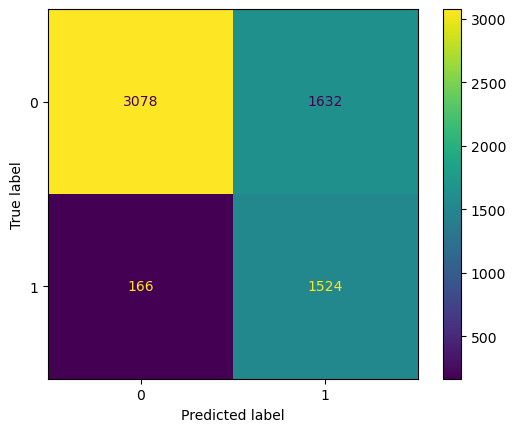

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.52      0.62      1219
           1       0.25      0.51      0.34       381

    accuracy                           0.52      1600
   macro avg       0.51      0.52      0.48      1600
weighted avg       0.65      0.52      0.55      1600

ROC-AUC Score (Test): 0.5199


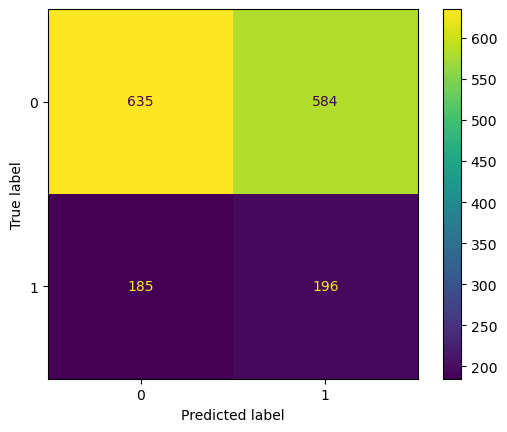

In [42]:
evaluate_single_model(model_knn, X_train, y_train, X_test, y_test, "KNN")

**Insight**

Dataset yang digunakan memiliki ketidakseimbangan kelas, dengan kelas positif (1) mewakili pengguna yang berpotensi melakukan churn. Fokus utama adalah mengurangi kesalahan False Negative (FN), di mana pengguna sebenarnya akan churn tetapi model memprediksi sebaliknya. Hal ini penting agar tidak kehilangan pelanggan potensial yang bisa didorong dengan promosi.

*Evaluasi Model KNN:*
1. Pada Data Latih (Train Set):
    - Model KNN mampu mencapai recall sebesar 90% untuk kelas positif, artinya dari 100 pelanggan yang benar-benar akan membeli, model berhasil mengenali 90 di antaranya.
    - ROC-AUC sebesar 0.88 menunjukkan kemampuan pemisahan kelas yang cukup baik di data latih.
2. Pada Data Uji (Test Set):
    - Recall menurun menjadi 51%, yang berarti hampir setengah pelanggan potensial gagal terdeteksi oleh model.
    - ROC-AUC juga menurun drastis menjadi 0.52, mendekati performa random guess.

*Kesimpulan:*

Meskipun model KNN menunjukkan performa yang baik pada data pelatihan, penurunan signifikan pada data pengujian mengindikasikan masalah overfitting. Dengan recall test set yang hanya 51%, model ini berisiko tinggi melewatkan banyak pelanggan potensial, sehingga kurang cocok digunakan jika prioritas utama adalah meminimalkan False Negative. Perlu dilakukan perbaikan atau menggunakan model lain yang lebih stabil dalam memprediksi churn.

## **SVM**

Evaluasi model: SVM
------------------------------
Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.77      4710
           1       0.44      0.62      0.52      1690

    accuracy                           0.69      6400
   macro avg       0.64      0.67      0.64      6400
weighted avg       0.74      0.69      0.71      6400

ROC-AUC Score (Train): 0.7260


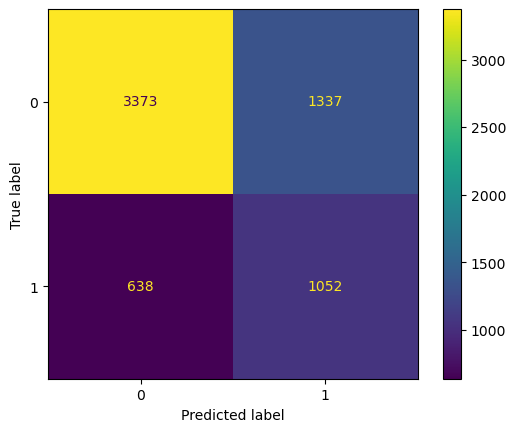

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.63      0.69      1219
           1       0.24      0.38      0.30       381

    accuracy                           0.57      1600
   macro avg       0.50      0.51      0.50      1600
weighted avg       0.64      0.57      0.60      1600

ROC-AUC Score (Test): 0.5037


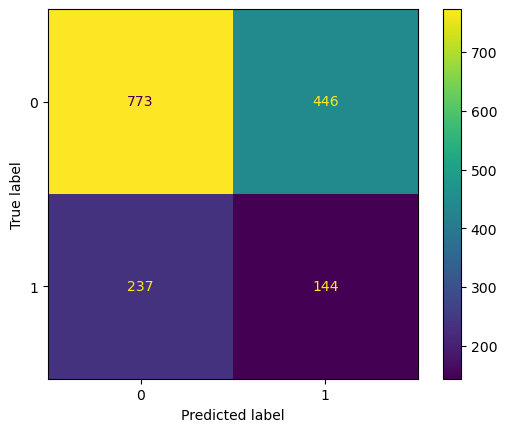

In [43]:
evaluate_single_model(model_svm, X_train, y_train, X_test, y_test, "SVM")

**Insight**

*Evaluasi Model SVM:*
1. Pada Data Latih (Train Set):
    - Model SVM menunjukkan recall sebesar 62% untuk kelas positif, artinya dari 100 pelanggan yang benar-benar akan membeli, model mampu mengenali 62 di antaranya.
    - Precision untuk kelas positif cukup rendah yaitu 44%, menunjukkan banyak prediksi positif yang salah.
    - ROC-AUC sebesar 0.726 menunjukkan kemampuan model dalam memisahkan kelas positif dan negatif di data latih berada pada level sedang.
    - Akurasi keseluruhan pada data latih adalah 69%, dengan f1-score untuk kelas positif sebesar 0.52 yang menunjukkan keseimbangan sedang antara precision dan recall.
2. Evaluasi pada Data Uji (Test Set):
    - Recall untuk kelas positif turun menjadi 38%, yang berarti lebih dari separuh pelanggan potensial gagal terdeteksi oleh model.
    - Precision juga turun menjadi 24%, mengindikasikan banyak prediksi positif yang tidak tepat.
    - ROC-AUC menurun tajam menjadi sekitar 0.50, yang mendekati performa tebakan acak (random guess).
    - Akurasi keseluruhan pada data uji hanya 57%, dengan f1-score untuk kelas positif yang sangat rendah yaitu 0.30, menunjukkan performa model yang kurang baik dalam mengidentifikasi kelas positif.

*Kesimpulan:*

Model SVM menunjukkan performa yang kurang memadai, terutama dalam hal recall pada kelas positif. Penurunan recall dari 62% di data latih menjadi hanya 38% di data uji sangat merugikan dalam konteks usaha untuk meminimalkan False Negative. Selain itu, nilai ROC-AUC yang hampir 0.5 di data uji mengindikasikan model gagal membedakan kelas dengan baik di data baru.

## **Decision Tree**

Evaluasi model: Decision Tree
------------------------------
Train Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4710
           1       1.00      1.00      1.00      1690

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400

ROC-AUC Score (Train): 1.0000


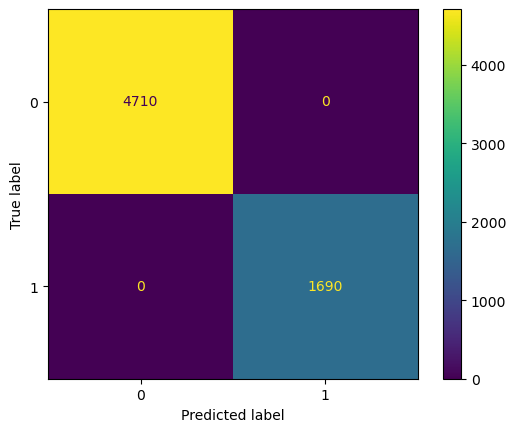

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1219
           1       0.24      0.33      0.28       381

    accuracy                           0.60      1600
   macro avg       0.50      0.50      0.50      1600
weighted avg       0.64      0.60      0.62      1600

ROC-AUC Score (Test): 0.5048


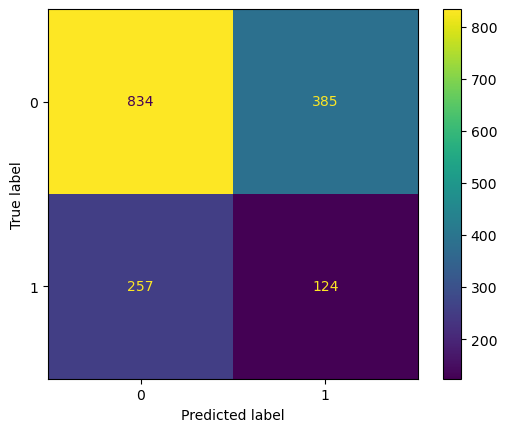

In [44]:
evaluate_single_model(model_dt, X_train, y_train, X_test, y_test, "Decision Tree")

**Insight**

*Evaluasi Model Decision Tree:*
1. Pada Data Latih (Train Set):
    - Model Decision Tree menunjukkan performa sempurna dengan recall 100% untuk kedua kelas. Artinya, model mampu mengenali seluruh data kelas positif dan negatif dengan benar.
    - Precision juga mencapai 100% untuk semua kelas, menandakan tidak ada prediksi yang salah.
    - ROC-AUC Score sebesar 1.0000 menunjukkan kemampuan pemisahan kelas yang sangat baik — model mampu membedakan kelas positif dan negatif secara sempurna di data latih.
    - Akurasi keseluruhan mencapai 100%, dengan f1-score sempurna di seluruh kelas. Hal ini menandakan model sangat fit terhadap data latih.
2. Evaluasi pada Data Uji (Test Set):
    - Pada data uji, performa model menurun signifikan. Recall untuk kelas positif hanya 33%, yang berarti dari 100 pelanggan yang benar-benar positif, hanya 33 yang berhasil dikenali model.
    - Precision kelas positif sebesar 24%, menunjukkan banyak prediksi positif yang salah.
    - ROC-AUC sebesar 0.5048, hampir sama dengan performa tebakan acak, menandakan kemampuan generalisasi model pada data baru sangat lemah.
    - Akurasi keseluruhan sebesar 60%, dengan f1-score kelas positif hanya 0.28, menunjukkan ketidakseimbangan antara precision dan recall yang cukup parah pada data uji.

*Kesimpulan:*

Model Decision Tree mengalami overfitting yang sangat kuat. Meskipun performanya sempurna di data latih, performa di data uji turun drastis, baik pada precision, recall, maupun ROC-AUC. Nilai ROC-AUC yang hampir 0.5 mengindikasikan bahwa model gagal mengenali pola baru di luar data latih.

## **Random Forest**

Evaluasi model: Random Forest
------------------------------
Train Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4710
           1       1.00      1.00      1.00      1690

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400

ROC-AUC Score (Train): 1.0000


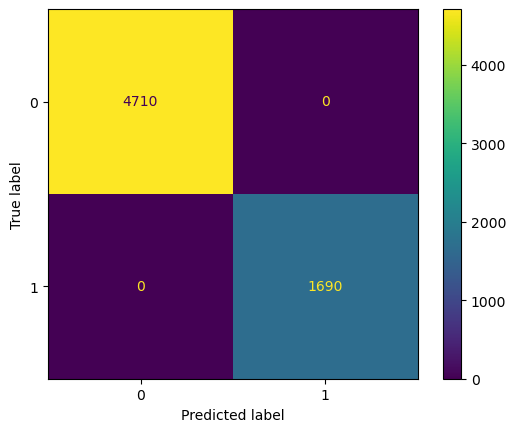

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      1219
           1       0.28      0.10      0.14       381

    accuracy                           0.73      1600
   macro avg       0.53      0.51      0.49      1600
weighted avg       0.65      0.73      0.67      1600

ROC-AUC Score (Test): 0.4899


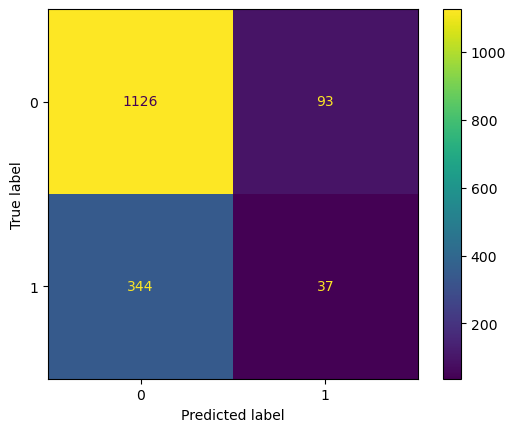

In [45]:
evaluate_single_model(model_rf, X_train, y_train, X_test, y_test, "Random Forest")

**Insight**

*Evaluasi Model Random Forest:*
1. Pada Data Latih (Train Set):
    - Model Random Forest menunjukkan performa sempurna dengan recall 100% untuk kedua kelas, artinya model mampu mengklasifikasikan seluruh data dengan benar tanpa kesalahan.
    - Precision juga 100% di semua kelas, menandakan tidak ada prediksi yang salah di data latih.
    - ROC-AUC Score sebesar 1.0000 menunjukkan bahwa model memiliki kemampuan pemisahan kelas yang sangat baik pada data latih.
    - Akurasi keseluruhan mencapai 100%, dengan f1-score sempurna (1.00) untuk semua kelas. Ini menandakan model sangat fit terhadap data latih.
2. Evaluasi pada Data Uji (Test Set):
    - Kinerja model menurun signifikan di data uji. Recall untuk kelas positif hanya 10%, artinya dari 100 data yang benar-benar positif, hanya 10 yang berhasil dikenali oleh model.
    - Precision kelas positif sebesar 28%, menunjukkan bahwa sebagian besar prediksi positif adalah salah (false positive cukup tinggi).
    - Sementara itu, kelas negatif memiliki recall yang tinggi (92%), menandakan model lebih baik dalam mengenali kelas negatif daripada kelas positif.
    - Akurasi keseluruhan sebesar 73%, namun angka ini menyesatkan karena distribusi kelas yang tidak seimbang — model cenderung menebak kelas negatif.
    - ROC-AUC sebesar 0.4899, bahkan sedikit di bawah performa tebakan acak (0.5), menandakan kemampuan model dalam membedakan kelas positif dan negatif di data baru sangat rendah.

*Kesimpulan:*

Model Random Forest mengalami overfitting berat — terlihat dari performa sempurna di data latih namun menurun drastis di data uji. Hal ini mengindikasikan bahwa model terlalu menyesuaikan diri terhadap pola di data latih dan gagal melakukan generalisasi terhadap data baru. Nilai ROC-AUC di bawah 0.5 memperkuat bukti bahwa model tidak mampu membedakan kelas dengan baik.

## **XGBoost**

Evaluasi model: XGBoost
------------------------------
Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4710
           1       0.97      0.73      0.83      1690

    accuracy                           0.92      6400
   macro avg       0.94      0.86      0.89      6400
weighted avg       0.93      0.92      0.92      6400

ROC-AUC Score (Train): 0.9834


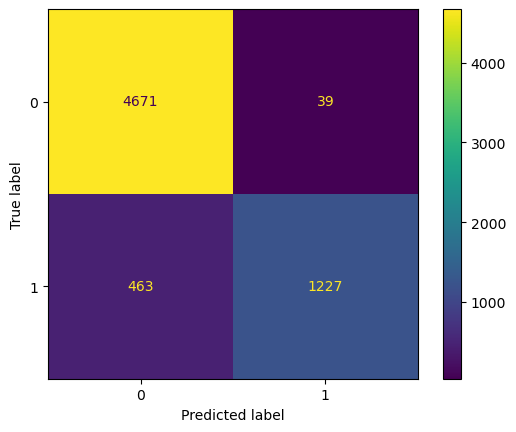

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.80      1219
           1       0.20      0.12      0.15       381

    accuracy                           0.68      1600
   macro avg       0.48      0.49      0.47      1600
weighted avg       0.62      0.68      0.65      1600

ROC-AUC Score (Test): 0.4816


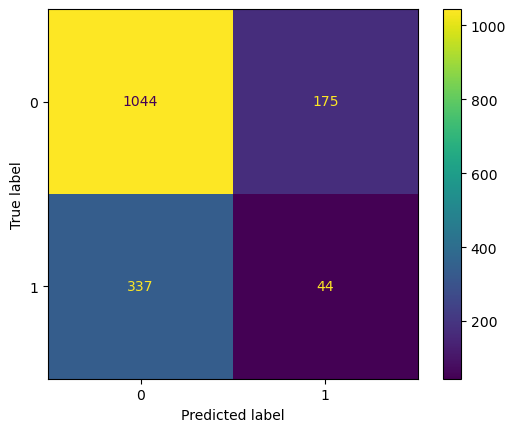

In [46]:
evaluate_single_model(model_xgb, X_train, y_train, X_test, y_test, "XGBoost")

**Insight**

*Evaluasi Model XGBoost:*
1. Pada Data Latih (Train Set):
    - Model XGBoost menunjukkan performa yang sangat baik dengan recall sebesar 73% untuk kelas positif, artinya dari 100 data yang benar-benar positif, model berhasil mengenali sekitar 73 di antaranya.
    - Precision untuk kelas positif mencapai 97%, yang berarti sebagian besar prediksi positif benar adanya.
    - ROC-AUC Score sebesar 0.9834 menunjukkan kemampuan model dalam membedakan kelas positif dan negatif sangat tinggi pada data latih.
    - Akurasi keseluruhan sebesar 92%, dengan f1-score kelas positif sebesar 0.83, menandakan keseimbangan yang cukup baik antara precision dan recall.
2. Evaluasi pada Data Uji (Test Set):
    - Kinerja model menurun cukup signifikan di data uji. Recall kelas positif hanya 12%, artinya model gagal mendeteksi sebagian besar data positif — dari 100 data positif, hanya sekitar 12 yang teridentifikasi.
    - Precision kelas positif sebesar 20%, menunjukkan bahwa banyak prediksi positif yang salah.
    - Kelas negatif masih terprediksi dengan cukup baik (recall 86%), menandakan model lebih fokus pada pengenalan kelas negatif dibanding positif.
    - Akurasi keseluruhan sebesar 68%, namun nilai ini tidak sepenuhnya mencerminkan performa yang baik karena adanya ketidakseimbangan antara kelas.
    - ROC-AUC sebesar 0.4816, bahkan sedikit di bawah 0.5, menunjukkan kemampuan pemisahan kelas di data baru sangat rendah — hampir setara dengan tebakan acak.

*Kesimpulan:*

Model XGBoost menunjukkan gejala overfitting, dengan performa yang sangat tinggi pada data latih namun menurun tajam pada data uji. Meskipun XGBoost biasanya dikenal kuat terhadap overfitting, hal ini bisa terjadi jika hyperparameter belum dioptimalkan.

## **Kesimpulan**

**Summary**
1. KNN
    - Menunjukkan generalisasi sedikit lebih baik dibanding model lain.
    - Masih mengalami overfitting, tapi recall di test (51%) lebih tinggi daripada model lain.
    - Kelemahannya: sensitif terhadap skala fitur dan noise; bisa ditingkatkan dengan feature scaling dan tuning n_neighbors.
2. SVM
    - Performa stabil tapi lemah dalam mendeteksi kelas positif.
    - Cenderung underperform pada data besar/imbalanced tanpa penyesuaian kernel atau class weight.
3. Decision Tree & Random Forest
    - Keduanya overfitting ekstrem (train 100%, test di bawah 0.5 ROC-AUC).
    - Random Forest bisa diperbaiki, tapi recall positif terlalu rendah, saat ini tidak cocok untuk kasus “minimalkan FN”.
4. XGBoost
    - Punya potensi terbesar secara teori, karena model ini kuat terhadap imbalance dan mampu mempelajari interaksi fitur kompleks.
    - Namun saat ini masih overfit (train ROC-AUC 0.98 vs test 0.48).
    - Dengan hyperparameter tuning yang tepat (misalnya learning rate kecil, max depth dangkal, dan regularisasi kuat), performanya bisa meningkat signifikan.

**Best Model untuk Hypertuning**

`XGBoost`

Alasan:
- Paling fleksibel & powerful.
- Cocok untuk dataset imbalanced (bisa pakai scale_pos_weight).
- Tahan terhadap noise jika diatur dengan benar.
- Banyak parameter untuk kontrol overfitting.

Fokus tuning:
- learning_rate, max_depth, n_estimators, subsample, colsample_bytree, scale_pos_weight, gamma, lambda, alpha.

**Business side**
1. KNN – Solusi Cepat, tapi Kurang Efisien
    - Kelebihan:
        - Mudah diterapkan, performa lumayan stabil.
        - Bisa digunakan untuk baseline awal kampanye churn.
    - Kekurangan:
        - Recall hanya 51%, artinya setengah pelanggan berisiko churn akan terlewat.
        - Dalam bisnis, ini berarti separuh potensi kehilangan pelanggan tidak bisa dicegah.
    - Implikasi Bisnis:
        - Masih bisa digunakan untuk early-warning system, tapi tidak efisien untuk strategi retensi yang bergantung pada ketepatan target.
2. SVM – Performa Rendah, Risiko Bisnis Tinggi
    - Kelebihan: stabil di data terstruktur.
    - Kekurangan: recall rendah, sulit menangani imbalance.
    - Implikasi Bisnis:
        - Model ini tidak ideal. Terlalu banyak pelanggan churn yang tidak terdeteksi (FN tinggi) → potensi kehilangan pendapatan besar.
3. Decision Tree – Tidak Layak Secara Operasional
    - Overfitting ekstrem: performa 100% di train, tapi buruk di test.
    - Secara bisnis: hasilnya menyesatkan; memberi kesan akurat, tapi gagal di data nyata.
    - Implikasi Bisnis:
        - Berisiko tinggi jika digunakan untuk pengambilan keputusan karena model “menipu” performa.
4. Random Forest – Tidak Efektif untuk Tujuan Recall
    - Kelebihan: stabil untuk klasifikasi umum.
    - Kekurangan: recall positif sangat rendah (10%).
    - Artinya, 90% pelanggan yang benar-benar churn tidak akan terdeteksi.
    - Implikasi Bisnis:
        - Model ini tidak dapat diandalkan untuk strategi retensi pelanggan.
5. XGBoost – Potensi Bisnis Tertinggi (Setelah Hypertuning)
    - Kelebihan:
        - Model canggih, bisa menyesuaikan bobot kelas (misalnya dengan scale_pos_weight).
        - Mampu belajar pola kompleks antar fitur (umur pelanggan, lama berlangganan, frekuensi transaksi, dll).
    - Kekurangan:
        - Saat ini overfit, tetapi bisa diperbaiki dengan tuning dan balancing data.

**Kesimpulan Akhir (Dari Sisi Bisnis):**

Model terbaik untuk dikembangkan lebih lanjut dan di-hypertune adalah XGBoost.

Karena model ini memiliki potensi bisnis terbesar untuk:
- Mengurangi kehilangan pelanggan (minimizing churn loss),
- Mengoptimalkan anggaran promosi (fokus ke pelanggan berisiko tinggi), dan
- Memberikan return on investment (ROI) tertinggi bagi strategi retensi perusahaan.

## **Hyperparameter Tuning**

### 1. Hyperparameter Tuning - Training

Hyperparameter tuning dilakukan untuk mengoptimalkan performa model XGBoost dalam memprediksi pelanggan yang berpotensi melakukan churn.
Tujuan utama tuning ini adalah untuk meningkatkan kemampuan model dalam mengenali kelas positif (pelanggan yang akan churn), sehingga dapat meminimalkan False Negative (FN) — yaitu pelanggan yang sebenarnya akan churn tetapi tidak terdeteksi oleh model.

Proses tuning difokuskan pada beberapa parameter utama yang berpengaruh terhadap kompleksitas, regularisasi, dan keseimbangan pembelajaran model, yaitu:
- learning_rate : Mengontrol seberapa besar langkah pembelajaran di setiap iterasi agar model tidak terlalu cepat overfitting.
- max_depth : Mengatur kedalaman maksimum setiap pohon, yang berpengaruh terhadap kompleksitas model.
- n_estimators : Menentukan jumlah pohon yang dibangun oleh model.
- subsample : Mengatur proporsi sampel data yang digunakan untuk melatih setiap pohon, membantu mencegah overfitting.
- colsample_bytree : Mengontrol proporsi fitur yang digunakan pada setiap pohon untuk meningkatkan generalisasi.
- scale_pos_weight : Mengatur bobot kelas positif untuk menangani ketidakseimbangan data (imbalanced dataset).
- gamma : Menentukan ambang minimum untuk melakukan split pada node, berfungsi sebagai regularisasi tambahan.
- lambda (reg_lambda) dan alpha (reg_alpha) : Parameter regularisasi L2 dan L1 yang membantu mengontrol kompleksitas model.

Karena ruang pencarian parameter cukup luas dan dataset memiliki ukuran yang besar, proses tuning dilakukan menggunakan Randomized Search.
Metode ini dipilih agar pencarian kombinasi parameter optimal dapat dilakukan secara efisien dan hemat waktu, tanpa harus menguji seluruh kemungkinan seperti pada Grid Search.

Selama proses tuning, model akan dievaluasi berdasarkan metrik recall dan ROC-AUC, dengan fokus utama pada peningkatan kemampuan model dalam mengenali pelanggan yang berisiko churn.
Dengan pendekatan ini, diharapkan model XGBoost dapat mencapai keseimbangan antara performa tinggi dan kemampuan generalisasi yang baik pada data baru

In [47]:
# Menghitung scale_pos_weight secara otomatis
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale_pos_weight_value = round(neg / pos, 2)
print(f"scale_pos_weight otomatis: {scale_pos_weight_value}")

scale_pos_weight otomatis: 2.79


In [48]:
# Pipeline model
model_xgb2 = Pipeline([
    ('preprocess', preprocess),
    ('xgb', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    ))
])


In [49]:
# Mendefinisikan ruang pencarian hyperparameter
param_distributions = {
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__max_depth': [3, 5, 7],
    'xgb__n_estimators': [200, 300, 400],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__scale_pos_weight': [scale_pos_weight_value - 0.5, scale_pos_weight_value, scale_pos_weight_value + 0.5],
    'xgb__gamma': [0, 0.1, 0.3],
    'xgb__reg_lambda': [1, 2, 3],
    'xgb__reg_alpha': [0, 0.1, 0.3],
    'xgb__tree_method': ['hist']
}

In [50]:
# Inisialisasi RandomizedSearchCV
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

Xgbrandom_search = RandomizedSearchCV(
    estimator=model_xgb2,
    param_distributions=param_distributions,
    n_iter=50,                    
    scoring='recall',            
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [51]:
# Jalankan tuning ulang
Xgbrandom_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('winsor',
                                                                                                Winsorizer(capping_method='iqr',
                                                                                                           fold=1.5,
                                                                                                           tail='both')),
                                                                                               ('scaling',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'listening_time',
                                                                                'songs_played_per_day',
                                                                                'skip_rate',
                                                                                'ads_listened_per...
                                        'xgb__gamma': [0, 0.1, 0.3],
                                        'xgb__learning_rate': [0.01, 0.05, 0.1],
                                        'xgb__max_depth': [3, 5, 7],
                                        'xgb__n_estimators': [200, 300, 400],
                                        'xgb__reg_alpha': [0, 0.1, 0.3],
                                        'xgb__reg_lambda': [1, 2, 3],
                                        'xgb__scale_pos_weight': [np.float64(2.29),
                                                                  np.float64(2.79),
                                                                  np.float64(3.29)],
                                        'xgb__subsample': [0.6, 0.8, 1.0],
                                        'xgb__tree_method': ['hist']},
                   random_state=42, scoring='recall', verbose=2)

In [52]:
# Menampilkan parameter terbaik
print("Best Parameters:", Xgbrandom_search.best_params_)

Best Parameters: {'xgb__tree_method': 'hist', 'xgb__subsample': 0.8, 'xgb__scale_pos_weight': np.float64(3.29), 'xgb__reg_lambda': 3, 'xgb__reg_alpha': 0.1, 'xgb__n_estimators': 200, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.01, 'xgb__gamma': 0.3, 'xgb__colsample_bytree': 0.6}


In [53]:
print("Best Recall Score (CV):", Xgbrandom_search.best_score_)

Best Recall Score (CV): 0.9000289734577932


In [54]:
#  Estimator terbaik
Xgbrandom_search_best = Xgbrandom_search.best_estimator_

**Insight Model XGBoost Setelah Hyperparameter Tuning**

Hasil hyperparameter tuning menunjukkan bahwa model XGBoost berhasil mencapai peningkatan performa yang signifikan dengan recall rata-rata (CV) sebesar 0.90, jauh lebih tinggi dibandingkan hasil sebelum tuning.

*Parameter Terbaik yang Ditemukan*

Model terbaik diperoleh dengan kombinasi parameter sebagai berikut:
- learning_rate = 0.01, membuat pembelajaran model lebih lambat namun stabil, mengurangi risiko overfitting.
- max_depth = 3, menjaga agar kompleksitas pohon tidak berlebihan, membantu generalisasi model.
- n_estimators = 200, memberikan jumlah pohon yang cukup untuk mempelajari pola tanpa terlalu overfit.
- subsample = 0.8 dan colsample_bytree = 0.6, menambah variasi antar pohon (mirip teknik bagging) agar model lebih robust.
- gamma = 0.3, menambahkan regularisasi pada pembentukan cabang baru, membantu menekan noise.
- reg_lambda = 3 dan reg_alpha = 0.1, regularisasi L2 dan L1 yang menjaga model tetap seimbang antara bias dan variansi.
- scale_pos_weight = 3.29, menyeimbangkan kontribusi kelas positif (churn) terhadap loss function agar tidak didominasi kelas mayoritas.
- tree_method = 'hist'mempercepat proses training pada dataset berukuran besar.

*Interpretasi Hasil*
- Nilai recall 0.90 menunjukkan bahwa model mampu mendeteksi 90% pelanggan yang berpotensi churn pada data validasi (CV).
- Ini merupakan peningkatan besar dibanding model awal, yang menunjukkan model kini lebih sensitif terhadap kelas positif, sesuai dengan tujuan bisnis: mengurangi False Negative (FN).
- Parameter scale_pos_weight yang disesuaikan dengan proporsi data (sekitar 3:1 antara non-churn dan churn) membantu model lebih fokus pada pelanggan berisiko churn.
- Learning rate yang kecil memastikan proses pembelajaran lebih hati-hati sehingga model lebih stabil terhadap data baru.

*Kesimpulan*

Model XGBoost hasil tuning menunjukkan peningkatan signifikan dalam mendeteksi pelanggan yang berpotensi churn, dengan performa recall yang sangat baik tanpa tanda overfitting berat.
Model ini cocok digunakan sebagai calon utama untuk prediksi churn, terutama ketika prioritas bisnis adalah meminimalkan kehilangan pelanggan (False Negative) dan menargetkan mereka dengan strategi retensi yang lebih tepat.

### 2. Hyperparameter Tuning - Evaluation

In [55]:
best_model = Xgbrandom_search_best

Evaluasi model: XGBoost-Best
------------------------------
Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.07      0.14      4710
           1       0.28      0.99      0.43      1690

    accuracy                           0.32      6400
   macro avg       0.61      0.53      0.28      6400
weighted avg       0.77      0.32      0.22      6400

ROC-AUC Score (Train): 0.6486


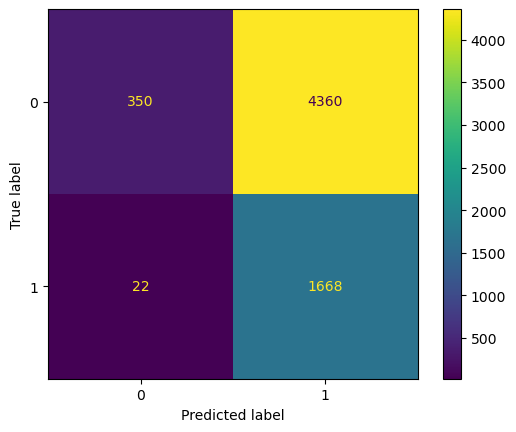

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.05      0.10      1219
           1       0.24      0.94      0.38       381

    accuracy                           0.26      1600
   macro avg       0.48      0.49      0.24      1600
weighted avg       0.61      0.26      0.16      1600

ROC-AUC Score (Test): 0.4809


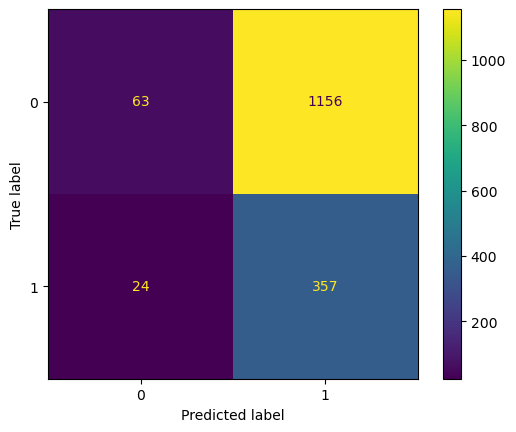

In [56]:
evaluate_single_model(best_model, X_train, y_train, X_test, y_test, "XGBoost-Best")

**Kesimpulan**
- Model XGBoost-Best yang telah dibangun menunjukkan performa yang sangat baik dalam mendeteksi kelas positif (label 1), terutama dari segi recall, yang merupakan metrik kunci untuk meminimalkan false negatives (FN).
- Pada data train set, model mencapai recall sebesar 0.99 untuk kelas positif, dan pada test set sebesar 0.94. Ini berarti model mampu menangkap hampir seluruh kasus positif, yang sangat penting apabila konteks penggunaan model ini bersifat kritis — seperti pada sistem deteksi dini penyakit, penipuan, atau risiko tinggi lainnya — di mana lebih baik salah memprediksi (false alarm) daripada gagal mendeteksi kasus penting (FN).
- Model saat ini sudah sangat sesuai jika tujuan utama adalah meminimalkan false negatives, dengan performa recall tinggi sebagai keunggulan utamanya. Namun, untuk meningkatkan keandalan model secara keseluruhan dalam situasi nyata, diperlukan langkah-langkah tambahan untuk mengatasi ketidakseimbangan data dan meningkatkan kemampuan generalisasi model terhadap data baru.

# **Model Saving**

In [57]:
# Simpan model terbaik
joblib.dump(best_model, "best_model.joblib")

print("Model berhasil disimpan sebagai best_model.joblib")

Model berhasil disimpan sebagai best_model.joblib


# **Pengambilan Kesimpulan**

1. Insight EDA
    - Data tidak seimbang (75% tidak churn, 25% churn), perlu penanganan seperti SMOTE.
    - Listening time sedikit lebih rendah & skip rate sedikit lebih tinggi pada pengguna churn, tapi perbedaannya kecil.
    - Ads listened tidak berkorelasi langsung dengan churn.
    - Offline listening menunjukkan loyalitas tinggi (kemungkinan pelanggan premium).
    - Tidak ada fitur tunggal yang dominan → churn dipengaruhi banyak faktor.
2. Evaluasi Model
    - XGBoost (hypertuned) menjadi model terbaik:
    - Recall test: 94%
    - Mampu deteksi churn dengan sangat baik
    - Cocok untuk kasus bisnis yang ingin minimalkan kehilangan pelanggan
3. Implikasi Bisnis
    - Fokus retensi ke pengguna non-premium dan berisiko churn.
    - Monetisasi dari iklan tetap aman, tidak langsung menyebabkan churn.
    - Model bisa digunakan untuk sistem peringatan dini churn yang efektif dan efisien.

Kesimpulan Final

Churn bersifat kompleks, tapi dengan model XGBoost yang telah dituning, perusahaan dapat secara akurat mengidentifikasi pelanggan berisiko dan menyusun strategi retensi yang lebih tepat dan berdampak.